In [1]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, round, mean
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#start a spark session
spark = SparkSession.builder.appName("Module3Lab").getOrCreate()

24/06/17 00:12:10 WARN Utils: Your hostname, codespaces-8fd1b1 resolves to a loopback address: 127.0.0.1; using 172.16.5.4 instead (on interface eth0)
24/06/17 00:12:10 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/06/17 00:12:11 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
#1. read the given csv file using PySPark
data = spark.read.csv("BostonHousing.csv", header=True, inferSchema=True)

In [4]:
#2. show the first 5 rows of the dataset
data.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [5]:
#3. count number of observation in the dataset
data.count()
#count number of atribute in the dataset
len(data.columns)

14

In [6]:
#4. show the schema of the dataset
data.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [7]:
#5. drop column "b" from the dataset
data = data.drop('b')

In [8]:
#check if the column was dropped
len(data.columns)

13

In [9]:
#6. Round all of the numerical columns into two decimal place
#import the round function
from pyspark.sql.functions import round
#store the column names
col_names = data.schema.names
#make a copy of the original dataset
data1 = data
for name in col_names:
    data1 = data1.withColumn(name, round(col(name),2))

In [10]:
#check if all of the numerical columns is in two decimal place
data1.show(5)

+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+
|crim|  zn|indus|chas| nox|  rm| age| dis|rad|tax|ptratio|lstat|medv|
+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+
|0.01|18.0| 2.31|   0|0.54|6.58|65.2|4.09|  1|296|   15.3| 4.98|24.0|
|0.03| 0.0| 7.07|   0|0.47|6.42|78.9|4.97|  2|242|   17.8| 9.14|21.6|
|0.03| 0.0| 7.07|   0|0.47|7.19|61.1|4.97|  2|242|   17.8| 4.03|34.7|
|0.03| 0.0| 2.18|   0|0.46| 7.0|45.8|6.06|  3|222|   18.7| 2.94|33.4|
|0.07| 0.0| 2.18|   0|0.46|7.15|54.2|6.06|  3|222|   18.7| 5.33|36.2|
+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+
only showing top 5 rows



In [11]:
#copy the data into original dataset
data = data1
#check the dataset again
data.show(5)

+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+
|crim|  zn|indus|chas| nox|  rm| age| dis|rad|tax|ptratio|lstat|medv|
+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+
|0.01|18.0| 2.31|   0|0.54|6.58|65.2|4.09|  1|296|   15.3| 4.98|24.0|
|0.03| 0.0| 7.07|   0|0.47|6.42|78.9|4.97|  2|242|   17.8| 9.14|21.6|
|0.03| 0.0| 7.07|   0|0.47|7.19|61.1|4.97|  2|242|   17.8| 4.03|34.7|
|0.03| 0.0| 2.18|   0|0.46| 7.0|45.8|6.06|  3|222|   18.7| 2.94|33.4|
|0.07| 0.0| 2.18|   0|0.46|7.15|54.2|6.06|  3|222|   18.7| 5.33|36.2|
+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+
only showing top 5 rows



In [12]:
#7. Create a new column (Age10)  with 10% increasing of 'age' column
data = data.withColumn("Age10", col("age") * (1 + 0.1))

In [13]:
data.show(5)

+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+------------------+
|crim|  zn|indus|chas| nox|  rm| age| dis|rad|tax|ptratio|lstat|medv|             Age10|
+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+------------------+
|0.01|18.0| 2.31|   0|0.54|6.58|65.2|4.09|  1|296|   15.3| 4.98|24.0| 71.72000000000001|
|0.03| 0.0| 7.07|   0|0.47|6.42|78.9|4.97|  2|242|   17.8| 9.14|21.6|             86.79|
|0.03| 0.0| 7.07|   0|0.47|7.19|61.1|4.97|  2|242|   17.8| 4.03|34.7| 67.21000000000001|
|0.03| 0.0| 2.18|   0|0.46| 7.0|45.8|6.06|  3|222|   18.7| 2.94|33.4|             50.38|
|0.07| 0.0| 2.18|   0|0.46|7.15|54.2|6.06|  3|222|   18.7| 5.33|36.2|59.620000000000005|
+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+------------------+
only showing top 5 rows



Text(0, 0.5, 'Frequency')

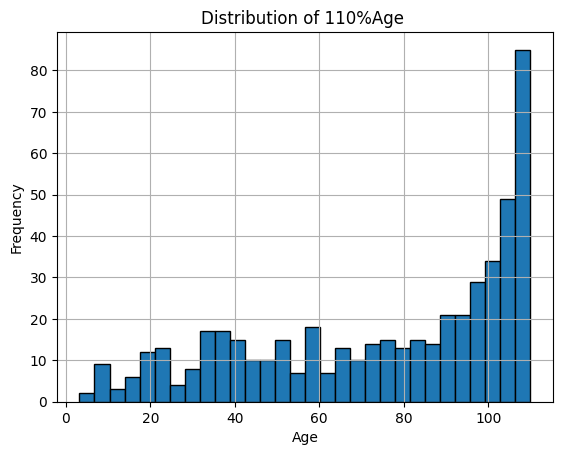

In [14]:
#8. Plot histogram Age10 column on a 2D Plot
import pandas as pd
pd_data = data.toPandas()
import matplotlib.pyplot as plt
pd_data['Age10'].hist(bins=30, edgecolor='black')
plt.title('Distribution of 110%Age ')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [15]:
#9. Provide Summary Statistics of all columns (count, mean, stddev,min, max)
data.describe().show()

24/06/17 00:12:21 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|summary|              crim|                zn|             indus|              chas|               nox|                rm|               age|               dis|              rad|               tax|           ptratio|             lstat|              medv|             Age10|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|  count|               506|               506|               506|               506|               506|               506|               506|               506|              

In [16]:
#10. Convert  Spark Dataframe to Pandas Dataframe
data_pd = data.toPandas()

In [17]:
#11. Show the last 5 rows of Pandas DataFrame
data_pd.tail(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,Age10
501,0.06,0.0,11.93,0,0.57,6.59,69.1,2.48,1,273,21.0,9.67,22.4,76.01
502,0.05,0.0,11.93,0,0.57,6.12,76.7,2.29,1,273,21.0,9.08,20.6,84.37
503,0.06,0.0,11.93,0,0.57,6.98,91.0,2.17,1,273,21.0,5.64,23.9,100.10
504,0.11,0.0,11.93,0,0.57,6.79,89.3,2.39,1,273,21.0,6.48,22.0,98.23
505,0.05,0.0,11.93,0,0.57,6.03,80.8,2.51,1,273,21.0,7.88,11.9,88.88


In [18]:
data_pd.head(10)
#in pandas dataframe, row starts at 0

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,Age10
0,0.01,18.0,2.31,0,0.54,6.58,65.2,4.09,1,296,15.3,4.98,24.0,71.72
1,0.03,0.0,7.07,0,0.47,6.42,78.9,4.97,2,242,17.8,9.14,21.6,86.79
2,0.03,0.0,7.07,0,0.47,7.19,61.1,4.97,2,242,17.8,4.03,34.7,67.21
3,0.03,0.0,2.18,0,0.46,7.00,45.8,6.06,3,222,18.7,2.94,33.4,50.38
4,0.07,0.0,2.18,0,0.46,7.15,54.2,6.06,3,222,18.7,5.33,36.2,59.62
5,0.03,0.0,2.18,0,0.46,6.43,58.7,6.06,3,222,18.7,5.21,28.7,64.57
6,0.09,12.5,7.87,0,0.52,6.01,66.6,5.56,5,311,15.2,12.43,22.9,73.26
7,0.14,12.5,7.87,0,0.52,6.17,96.1,5.95,5,311,15.2,19.15,27.1,105.71
8,0.21,12.5,7.87,0,0.52,5.63,100.0,6.08,5,311,15.2,29.93,16.5,110.00
9,0.17,12.5,7.87,0,0.52,6.00,85.9,6.59,5,311,15.2,17.10,18.9,94.49


In [19]:
# Stop the Spark session
spark.stop()